# Fitting ALPS through GCV

## Importing the libraries

In [1]:
import pickle
from Functions import *
from matplotlib.pyplot import *

## Getting the data

In [2]:
Data = pickle.load( open( "ts1.p", "rb" ) )

## Plotting

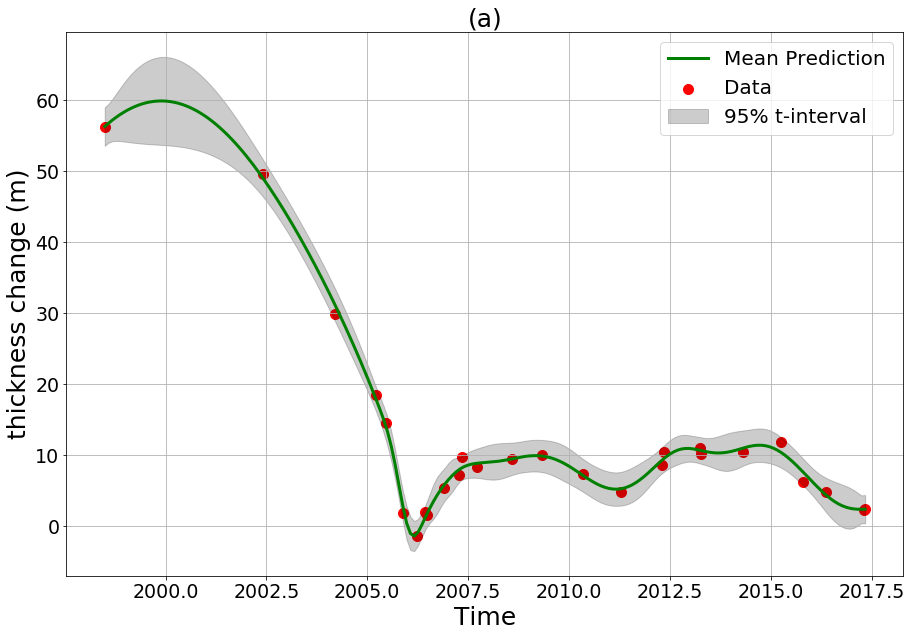

In [3]:
#figure(figsize=(20,8))
f1 = figure(figsize=(15,10))
ax = subplot2grid((1,1),(0,0))
####### Scatter plot for the smaller time series
p = 4;q=2
scatter(Data[:,0],Data[:,1],color = 'r',s = 100,label = 'Data')
[n,lamb,sigmasq] = full_search_nk(Data,p,q)
c = n+p
U = Kno_pspline_opt(Data,p,n)
B = Basis_Pspline(n,p,U,Data[:,0])
P = Penalty_p(q,c)
theta = np.linalg.solve(B.T.dot(B) + lamb*P, B.T.dot(Data[:,1].reshape(-1,1)))
### Getting mean of the prediction
num = 200
xpred = linspace(Data[0,0],Data[-1,0],num)
Bpred = Basis_Pspline(n,p,U,xpred)
ypred1 = Bpred.dot(theta)
std_t1,std_n1 = Var_bounds(Data,Bpred,B,theta,P,lamb)


ax.plot(xpred,ypred1,linewidth=3,color = 'g',label = 'Mean Prediction')
ax.set_title('(a)',size = 25)
ax.tick_params(axis='x', labelsize=19)
ax.tick_params(axis='y', labelsize=19)
ax.set_xlabel('Time',size=25)
ax.set_ylabel('thickness change (m)',size = 25)
ax.fill_between(xpred.flatten(),ypred1.flatten()-std_t1,ypred1.flatten()+std_t1, alpha = 0.2,color = 'k',label = '95% t-interval')
ax.legend(fontsize=20)
ax.grid(True)
show()